In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv('fifa_allrows.csv')

In [3]:
df = df[['shooting', 'forvet']]

In [4]:
df.head()

,shooting,forvet
0,93,2
1,90,2
2,84,2
3,90,2
4,90,0


In [5]:
def change_pas(p):
    if p >= 80:
        return 2
    elif p >= 60:
        return 1
    else:
        return 0

In [6]:
df['shooting'] = df['shooting'].apply(change_pas)

In [7]:
df.head()

,shooting,forvet
0,2,2
1,2,2
2,2,2
3,2,2
4,2,0


In [8]:
table = pd.crosstab(index=[df['shooting']], columns=df['forvet'], normalize="columns")
table

forvet,0,1,2
shooting,,,
0,0.821124,0.106907,0.000000
1,0.175324,0.889988,0.459302
2,0.003552,0.003104,0.540698


In [9]:
chi_stats = stats.chi2_contingency(table)
chi_stats

(2.853204095453518,
 0.5826840934442439,
 4,
 array([[0.30934378, 0.30934378, 0.30934378],
        [0.50820478, 0.50820478, 0.50820478],
        [0.18245144, 0.18245144, 0.18245144]]))

In [10]:
alpha = 0.05  # significance level 

In [11]:
critical_value = crit = stats.chi2.ppf(q = 1 - alpha, # Find the critical value for 95% confidence*
                      df = chi_stats[2]) #degree of freedom
critical_value

9.487729036781154

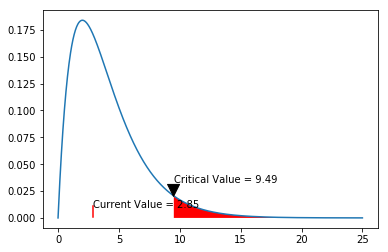

In [12]:
x = np.linspace(0, 25, 1000)  # set range for x-axis
plt.plot(x, stats.chi2.pdf(x, chi_stats[2]))  # plot chi2 distribution with given degrees of freedom

plt.axvline(x=critical_value, ymin=0.05,ymax=0.05, c='r')
plt.axvline(x=chi_stats[0], ymin=0.05,ymax=0.1, c='r')

plt.annotate('Current Value = {0:.2f}'.format(chi_stats[0]), xy=(chi_stats[0], 0.02), xytext=(chi_stats[0], 0.01))

plt.annotate('Critical Value = {0:.2f}'.format(critical_value), xy=(critical_value, 0.02), xytext=(critical_value, 0.04), 
        arrowprops=dict(facecolor='black', shrink=0.5), verticalalignment='top' )

plt.fill_between(x, stats.chi2.pdf(x, chi_stats[2]), where= x > critical_value, facecolor='red', interpolate=True)

In [13]:
observed_chi_val = chi_stats[0]
#if observed chi-square < critical chi-square, then variables are not related
#if observed chi-square > critical chi-square, then variables are not independent (and hence may be related).
observed_chi_val

2.853204095453518

In [14]:
if observed_chi_val <= critical_value:
    # observed value is not in critical area therefore we accept null hypothesis
    print ('Null hypothesis cannot be rejected')
else:
    # observed value is in critical area therefore we reject null hypothesis
    print ('reject null hypothesis')

Null hypothesis cannot be rejected
